In [1]:
%%capture --no-stderr
# 安装 LangGraph 和 LangSmith，用于状态图和跟踪
%pip install -U langgraph langsmith

In [2]:
import os

# 开启 LangSmith 跟踪，便于调试和查看详细执行信息
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ChatBot"

In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# 定义状态类型，继承自 TypedDict，并使用 add_messages 函数将消息追加到现有列表
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 创建一个状态图对象，传入状态定义
graph_builder = StateGraph(State)

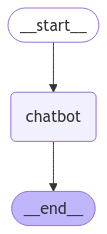

In [4]:
from langchain_ollama import ChatOllama
chat_model = ChatOllama(model="llama3.2",temperature="0.5",base_url="http://192.168.22.6:11434")
# 定义聊天机器人的节点函数，接收当前状态并返回更新的消息列表
def chatbot(state: State):
    return {"messages": [chat_model.invoke(state["messages"])]}

# 第一个参数是唯一的节点名称，第二个参数是每次节点被调用时的函数或对象
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# 编译状态图并生成可执行图对象
graph = graph_builder.compile()

# 你可以使用 get_graph 方法来可视化图，并结合 draw 方法（如 draw_ascii 或 draw_png）
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
import getpass
import os
# 开始一个简单的聊天循环
def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"请输入您的 {var}")
        
        
_set_if_undefined("LANGSMITH_API_KEY")

while True:
    # 获取用户输入
    user_input = input("User: ")
    
    # 可以随时通过输入 "quit"、"exit" 或 "q" 退出聊天循环
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")  # 打印告别信息
        break  # 结束循环，退出聊天

    # 将每次用户输入的内容传递给 graph.stream，用于聊天机器人状态处理
    # "messages": ("user", user_input) 表示传递的消息是用户输入的内容
    for event in graph.stream({"messages": ("user", user_input)}):
        
        # 遍历每个事件的值
        for value in event.values():
            # 打印输出 chatbot 生成的最新消息
            print("Assistant:", value["messages"][-1].content)

c:\Users\zhanghe\.conda\envs\openai-quickstart\lib\site-packages\langsmith\client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=264a4585-63ea-428c-8afc-73eb583bae02,id=264a4585-63ea-428c-8afc-73eb583bae02; trace=264a4585-63ea-428c-8afc-73eb583bae02,id=c0e6bf21-0fc1-4d99-aede-9d69be7bc3b6; trace=264a4585-63ea-428c-8afc-73eb583bae02,id=f91e7744-27f9-4bbd-a656-2d4d9eac4790; trace=264a4585-63ea-428c-8afc-73eb583bae02,id=79ec929a-39ff-4a28-b398-ae4b6b59c864


Assistant: LangGraph 是一个开源的图形计算框架，特别设计用于边界计算和深度学习。它以其高效、灵活性和易于使用的特点而闻名。

** LangGraph 的基本概念**

LangGraph 是基于 C++ 和 CUDA 的图形计算框架，它支持多种算法，包括边界计算（BGC）、深度学习（DL）等。它利用 GPU 来加速图形计算，特别是对于大型图形数据的处理。

** LangGraph 的特点**

1. **高效性**：LangGraph 通过使用 GPU 和 CUDA 等技术来最大化 CPU 和 GPU 的性能，可以显著提高图形计算的速度。
2. **灵活性**：LangGraph 支持多种算法和框架，包括边界计算、深度学习等，可以满足不同应用场景的需求。
3. **易于使用**：LangGraph 通过提供简单的 API 和高级的编程模型，使得用户可以轻松地使用其功能。
4. **开源**：LangGraph 是一个开源项目，允许用户自由地使用、修改和分发其代码。

** LangGraph 的应用场景**

1. **边界计算（BGC）**：LangGraph 通过支持多种边界计算算法来提供高效的图形计算解决方案。
2. **深度学习（DL）**：LangGraph 支持多种深度学习框架和算法，包括 PyTorch 和 TensorFlow 等，可以用于神经网络的训练和推理。
3. **图形处理**：LangGraph 可以用于各种图形处理应用场景，例如图像处理、视频处理等。

** LangGraph 的优势**

1. **高性能**：LangGraph 通过使用 GPU 和 CUDA 等技术来最大化 CPU 和 GPU 的性能，可以显著提高图形计算的速度。
2. **易用性**：LangGraph 通过提供简单的 API 和高级的编程模型，使得用户可以轻松地使用其功能。
3. **灵活性**：LangGraph 支持多种算法和框架，包括边界计算、深度学习等，可以满足不同应用场景的需求。

** LangGraph 的缺点**

1. **学习曲线**：由于 LangGraph 是一个高级的图形计算框架，使用其可能需要一定的学习曲线。
2. **资源消耗**：LangGraph 通过使用 GPU 和 CUDA 等技术来最大化 CPU 和

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=264a4585-63ea-428c-8afc-73eb583bae02,id=3aa85306-1d6e-421f-929b-823639cf3a0f; trace=264a4585-63ea-428c-8afc-73eb583bae02,id=f91e7744-27f9-4bbd-a656-2d4d9eac4790; trace=264a4585-63ea-428c-8afc-73eb583bae02,id=79ec929a-39ff-4a28-b398-ae4b6b59c864; trace=264a4585-63ea-428c-8afc-73eb583bae02,id=264a4585-63ea-428c-8afc-73eb583bae02


KeyboardInterrupt: Interrupted by user

In [6]:
%%capture --no-stderr
# 安装 Tavily 搜索引擎的 Python 包
%pip install -U tavily-python
%pip install -U langchain_community

In [ ]:
# import getpass
# import os

# if not os.environ.get("TAVILY_API_KEY"):
#     os.environ["TAVILY_API_KEY"] = getpass.getpass("Tavily API key:\n")